In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

df = pd.read_parquet("../data/bergingspercentage_rucphen_parquet/RUC0001_WTH_RIO_DWA.Bergingspercentage.parquet")

In [94]:
df.head()

,Date,Time,Value [m³/h],Unnamed: 4
0,01-01-2018,00:00:00,9.583,NaN
1,01-01-2018,00:05:00,9.583,NaN
2,01-01-2018,00:10:00,9.583,NaN
3,01-01-2018,00:15:00,9.583,NaN
4,01-01-2018,00:20:00,9.583,NaN


In [97]:
# Data cleaning/preperation
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d-%m-%Y %H:%M:%S")
df.drop(columns= 'Date', inplace= True)

# Rename columns
df = df.rename(columns={'Value [m³/h]': 'percentage'})
# Define the desired order of columns
desired_order = ['datetime', 'percentage']

# Reorder columns using reorder_levels
df = df[desired_order]
df.head()

,datetime,percentage
0,2018-01-01 00:00:00,9.583
1,2018-01-01 00:05:00,9.583
2,2018-01-01 00:10:00,9.583
3,2018-01-01 00:15:00,9.583
4,2018-01-01 00:20:00,9.583


In [98]:
df["percentage"].max()

100.0

In [99]:
df["percentage"].min()

0.0

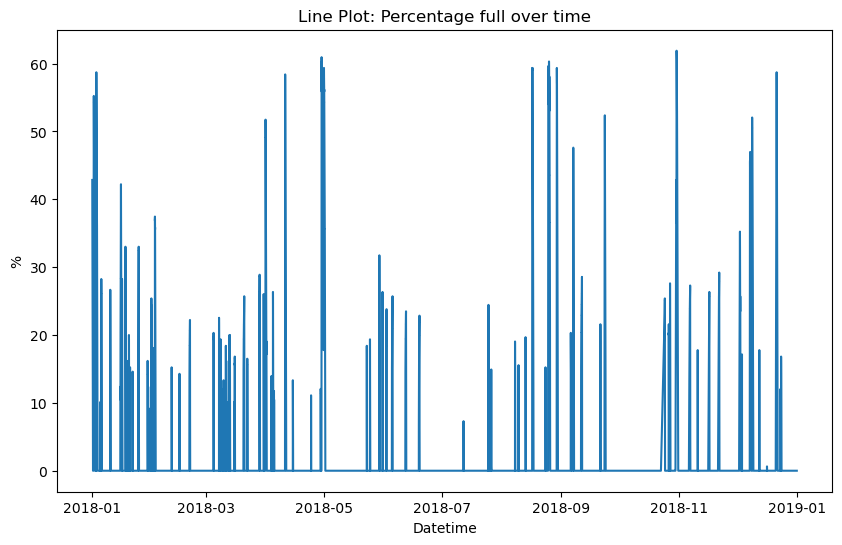

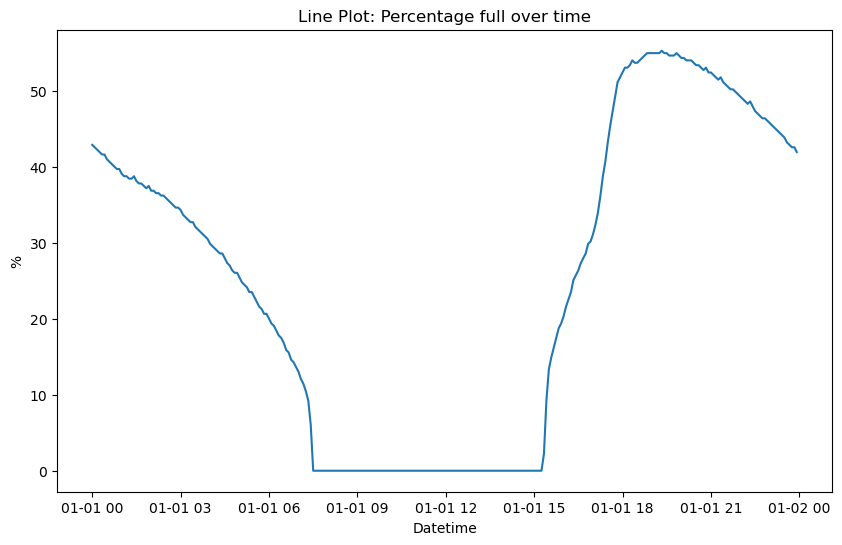

In [92]:
def create_plot(df):
    # Create a line plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='datetime', y='percentage')

    # Set labels and title
    plt.xlabel('Datetime')
    plt.ylabel('%')
    plt.title('Line Plot: Percentage full over time')

    # Display the plot
    plt.show()

df_2018 = df[df['datetime'].dt.year == 2018]
df_jan_2018 = df[(df['datetime'].dt.year == 2018) & (df['datetime'].dt.month == 1) & (df['datetime'].dt.day == 1)]

create_plot(df_2018)
create_plot(df_jan_2018)